In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_diabetes
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [6]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Outcome']
data = pd.read_csv("diabetes_data.csv")

In [8]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Pre-process

In [9]:
# Drop any missing or null values
data = data.dropna()

# One-hot encode the categorical columns
data = pd.get_dummies(data, columns=['Age','Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                                     'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                                     'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity'])


# Print the cleaned dataset
print(data.head())

# Split the dataset into features and target
X = data.drop('class', axis=1)
y = data['class']
data

      class  Age_16  Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  Age_31  \
0  Positive       0       0       0       0       0       0       0       0   
1  Positive       0       0       0       0       0       0       0       0   
2  Positive       0       0       0       0       0       0       0       0   
3  Positive       0       0       0       0       0       0       0       0   
4  Positive       0       0       0       0       0       0       0       0   

   Age_32  ...  delayed healing_No  delayed healing_Yes  partial paresis_No  \
0       0  ...                   0                    1                   1   
1       0  ...                   1                    0                   0   
2       0  ...                   0                    1                   1   
3       0  ...                   0                    1                   1   
4       0  ...                   0                    1                   0   

   partial paresis_Yes  muscle stiffness_No  muscl

,class,Age_16,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,Positive,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,Positive,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
3,Positive,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,Positive,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Positive,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
516,Positive,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
517,Positive,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
518,Negative,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0


## Training

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Import svm model

#Create a svm Classifier
clf = SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=20)

# Print the mean accuracy score and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print(accuracy)

Accuracy: 0.9577 (+/- 0.1352)
0.9423076923076923


In [ ]:
base_estimator = SVC(C= 10, degree= 4, gamma = 'scale', kernel='poly', probability= True, shrinking = True)

# Define the bagging classifier
n_estimators = 10
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, max_samples=0.5, max_features=0.7)

# Define the parameter grid for grid search
param_grid = {
    'base_estimator__C': [1, 10, 20],
    'base_estimator__kernel': ['linear', 'rbf'],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'random_state': [42],
    'n_jobs': [-1]
}

# Perform grid search with different values of cv
cv_list = [5, 10, 20, 30, 50]
for cv in cv_list:
    grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"CV={cv}, Best score: {grid_search.best_score_:.4f}, Best params: {grid_search.best_params_}")

CV=5, Best score: 0.9712, Best params: {'base_estimator__C': 20, 'base_estimator__kernel': 'rbf', 'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 42}
CV=10, Best score: 0.9760, Best params: {'base_estimator__C': 20, 'base_estimator__kernel': 'rbf', 'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 42}
CV=20, Best score: 0.9760, Best params: {'base_estimator__C': 10, 'base_estimator__kernel': 'rbf', 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
CV=30, Best score: 0.9760, Best params: {'base_estimator__C': 20, 'base_estimator__kernel': 'rbf', 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}


In [ ]:
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=5)
X = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

# Define the base model and its hyperparameters
base_model = DecisionTreeClassifier(random_state=42, max_depth=4)
param_grid = {
  'base_estimator__max_depth': [2, 4, 6, 8, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}
# Define the BaggingClassifier and perform hyperparameter tuning using GridSearchCV
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Fit the tuned model on the training data and make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the tuned model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Check if the desired accuracy is met
if accuracy >= 0.8:
    print("Final prediction: Positive")
else:
    print("Restart from Resampling")

In [22]:
def evaluate_models(models, X, y, cv=20, n_jobs=-1):
    results = {}
    for name, model in models.items():
        bagging_clf = BaggingClassifier(base_estimator=model, n_estimators=150, random_state=42, n_jobs=n_jobs)
        bagging_clf.fit(X_train, y_train)
        y_pred = bagging_clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate cross-validation scores
        cv_accuracy = cross_val_score(bagging_clf, X, y, cv=cv, scoring='accuracy').mean()
        cv_precision = cross_val_score(bagging_clf, X, y, cv=cv, scoring=make_scorer(precision_score, average='weighted')).mean()
        cv_recall = cross_val_score(bagging_clf, X, y, cv=cv, scoring=make_scorer(recall_score, average='weighted')).mean()
        cv_f1 = cross_val_score(bagging_clf, X, y, cv=cv, scoring=make_scorer(f1_score, average='weighted')).mean()

        # Calculate precision, recall, and F1 score
        cr = classification_report(y_test, y_pred, output_dict=True)
        precision = cr['weighted avg']['precision']
        recall = cr['weighted avg']['recall']
        f1 = cr['weighted avg']['f1-score']

        results[name] = {
            'accuracy': accuracy, 
            'precision': precision, 
            'recall': recall, 
            'f1': f1, 
            'cv_accuracy': cv_accuracy, 
            'cv_precision': cv_precision, 
            'cv_recall': cv_recall, 
            'cv_f1': cv_f1
        }
        print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, CV Accuracy={cv_accuracy:.4f}, CV Precision={cv_precision:.4f}, CV Recall={cv_recall:.4f}, CV F1={cv_f1:.4f}")

    return results

In [90]:
# Define the PCA estimator
pca = PCA(n_components=5)

# Apply PCA to the training and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the base estimator
base_estimator =   SVC(C= 10, degree= 4, gamma = 'scale', kernel='poly', probability= True, shrinking = True)
# Define the bagging classifier
n_estimators = 200
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators)

# Train the model and evaluate performance
max_iterations = 280
min_accuracy = 0.95
for i in range(max_iterations):
    bagging.fit(X_train_pca, y_train)
    y_pred = bagging.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Iteration {i+1}: accuracy={accuracy:.4f}")
    if accuracy >= min_accuracy:
        print("Desired accuracy met, stopping iterations")
        break


Iteration 1: accuracy=0.8942


KeyboardInterrupt: 

In [23]:
base_models = {
    'SVC': SVC(C= 10, degree= 4, gamma = 'scale', kernel='poly', probability= True, shrinking = True),
    'Logistic Regression': LogisticRegression(C= 0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf = 2, min_samples_split= 2),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors= 9, weights = 'uniform'),
}

results = evaluate_models(base_models, X_train, y_train)

SVC: Accuracy=0.9808, Precision=0.9819, Recall=0.9808, F1=0.9809, CV Accuracy=0.9761, CV Precision=0.9773, CV Recall=0.9761, CV F1=0.9760
Logistic Regression: Accuracy=0.9231, Precision=0.9231, Recall=0.9231, F1=0.9231, CV Accuracy=0.9161, CV Precision=0.9254, CV Recall=0.9161, CV F1=0.9163
Decision Tree: Accuracy=0.9519, Precision=0.9517, Recall=0.9519, F1=0.9517, CV Accuracy=0.9254, CV Precision=0.9320, CV Recall=0.9254, CV F1=0.9249
k-Nearest Neighbors: Accuracy=0.8558, Precision=0.8763, Recall=0.8558, F1=0.8595, CV Accuracy=0.9260, CV Precision=0.9387, CV Recall=0.9260, CV F1=0.9264


In [45]:
# Define the base estimator
base_estimator = SVC()

#Decision Tree: Accuracy=0.9519, Precision=0.9517, Recall=0.9519, F1=0.9517, CV Accuracy=0.9303, CV Precision=0.9317, CV Recall=0.9303, CV F1=0.9302
# Define the bagging classifier with PCA
n_estimators = [10, 50, 100]
max_samples = [0.5, 0.7, 0.9]
max_features = [0.5, 0.7, 0.9]
n_components = [2, 5, 10]
#SVC: Accuracy=0.9808, Precision=0.9819, Recall=0.9808, F1 Score=0.9809, CV Score=0.9761
#Logistic Regression: Accuracy=0.9135, Precision=0.9143, Recall=0.9135, F1 Score=0.9138, CV Score=0.9137
#Decision Tree: Accuracy=0.9519, Precision=0.9517, Recall=0.9519, F1 Score=0.9517, CV Score=0.9230
#k-Nearest Neighbors: Accuracy=0.8558, Precision=0.8763, Recall=0.8558, F1 Score=0.8595, CV Score=0.9282
pipeline = Pipeline([
    ('pca', PCA()),
    ('bagging', BaggingClassifier(base_estimator=base_estimator))
])

# Define the parameter grid
param_grid = {
    'pca__n_components': n_components,
    'bagging__n_estimators': n_estimators,
    'bagging__max_samples': max_samples,
    'bagging__max_features': max_features,
    'bagging__base_estimator__C': [0.1, 1, 10],
    'bagging__base_estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Define the grid search object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'bagging__base_estimator__C': 10, 'bagging__base_estimator__kernel': 'poly', 'bagging__max_features': 0.9, 'bagging__max_samples': 0.7, 'bagging__n_estimators': 100, 'pca__n_components': 10}
Best score: 0.9735


In [67]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Decision Tree': {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']},
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4], # Only used if kernel is 'poly'
        'gamma': ['scale', 'auto'],
        'shrinking': [True, False],
        'probability': [True, False],
    }
}

# Create a function to perform hyperparameter tuning using GridSearchCV
def tune_hyperparameters(models, param_grids, X, y, cv=5):
    tuned_models = {}
    for name, model in models.items():
        grid_search = GridSearchCV(model, param_grid=param_grids[name], scoring='accuracy', cv=cv)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        tuned_models[name] = best_model
        print(f"{name}: {best_score:.4f} (Best Params: {grid_search.best_params_})")
    return tuned_models

# Perform hyperparameter tuning
tuned_models = tune_hyperparameters(base_models, param_grids, X_train, y_train)

# Evaluate the performance of the tuned models using bagging, bootstrap resampling, and cross-validation
tuned_results = evaluate_models(tuned_models, X_train, y_train)

SVC: 0.9664 (Best Params: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True})
SVC: 0.9712 (+/- 0.0286)


In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train and evaluate an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.4f}")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Negative' 'Positive']

In [11]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}


xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"XGBoost (Tuned): {best_score:.4f} (Best Params: {grid_search.best_params_})")

y_pred = best_xgb_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred)

print(f"Tuned XGBoost Accuracy: {tuned_accuracy:.4f}")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


KeyboardInterrupt: 

In [14]:
# Create the base models
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Create BaggingClassifiers with the base models
bagging_decision_tree = BaggingClassifier(base_estimator=decision_tree, n_estimators=50, random_state=42)
bagging_logistic_regression = BaggingClassifier(base_estimator=logistic_regression, n_estimators=50, random_state=42)
knn = KNeighborsClassifier()
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=50, random_state=42)

# Train and evaluate the BaggingClassifiers
models = {'Decision Tree': bagging_decision_tree, 'Logistic Regression': bagging_logistic_regression, 'k-Nearest Neighbors': bagging_knn}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Bagging Accuracy: {accuracy:.4f}")

Decision Tree Bagging Accuracy: 0.7532
Logistic Regression Bagging Accuracy: 0.7662
k-Nearest Neighbors Bagging Accuracy: 0.7143


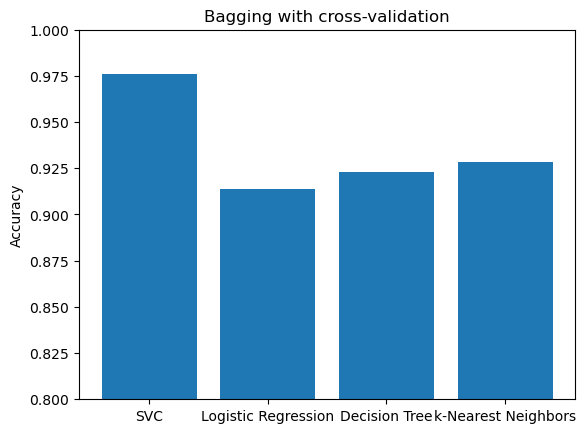

In [13]:
import matplotlib.pyplot as plt

models = ['SVC', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
accuracies = [0.9761, 0.9137, 0.9230, 0.9282]

plt.bar(models, accuracies)
plt.ylim(0.8, 1.0)  # set y-axis limits to emphasize differences between accuracies
plt.ylabel('Accuracy')
plt.title('Bagging with cross-validation')
plt.show()

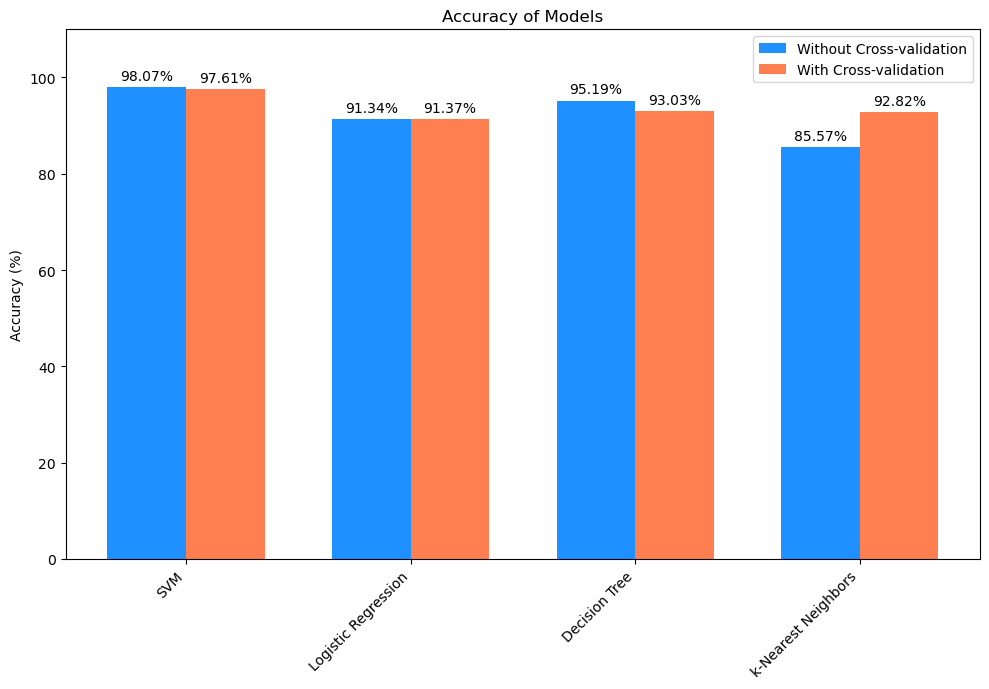

In [14]:
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
accuracy_without_cv = [x * 100 for x in [0.9807, 0.9134, 0.9519, 0.8557]]
accuracy_with_cv = [x * 100 for x in [0.9761, 0.9137, 0.9303, 0.9282]]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, accuracy_without_cv, width, label='Without Cross-validation', color='dodgerblue')
rects2 = ax.bar(x + width/2, accuracy_with_cv, width, label='With Cross-validation', color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy of Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate Model names to avoid overlap
ax.legend()

# Adjust the y limits to give space for text
ax.set_ylim([0, 110])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

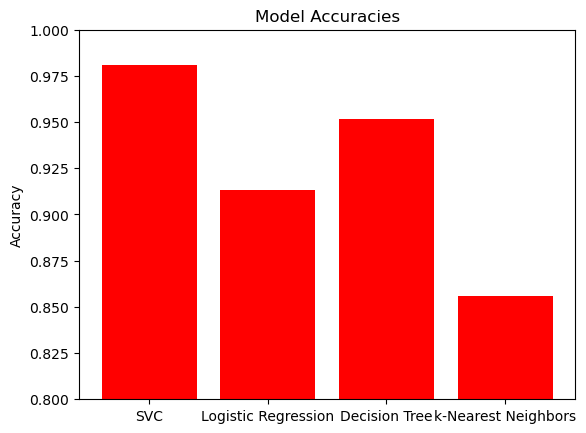

In [80]:
import matplotlib.pyplot as plt

models = ['SVC', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
accuracies = [0.9807, 0.9134, 0.9519, 0.8557]

plt.bar(models, accuracies, color = 'red')
plt.ylim(0.8, 1.0)  # set y-axis limits to emphasize differences between accuracies
plt.ylabel('Accuracy')
plt.title('Bagging without cross-validation')
plt.show()

/var/folders/fq/x1sslcf904b46lvn63t6cwt80000gn/T/ipykernel_13954/1702298983.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_plot = sns.lineplot(x=models, y=accuracies_percentage, palette=palette, marker="o")


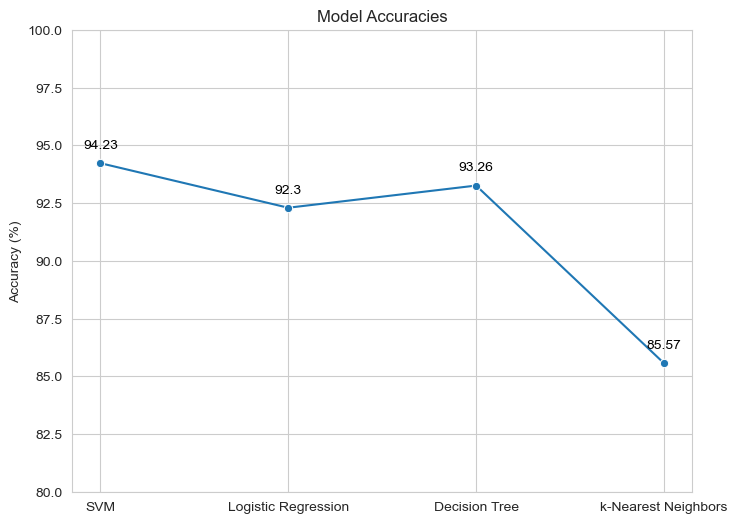

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to seaborn for prettier plots
sns.set_style("whitegrid")

# Define the models and accuracies
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
accuracies = [0.9423, 0.9230, 0.9326, 0.8557]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]

# Create a color palette
palette = sns.color_palette("husl", len(models))

# Create the line plot
plt.figure(figsize=(8, 6))  # Set the figure size
line_plot = sns.lineplot(x=models, y=accuracies_percentage, palette=palette, marker="o")

# Annotate each point with its value
for idx, acc in enumerate(accuracies_percentage):
    line_plot.text(idx, acc + 0.5, round(acc, 2), color='black', ha="center", va='bottom')  # Adjusted the y-position slightly for better visualization

# Set y-axis limits to emphasize differences between accuracies
plt.ylim(80, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.show()


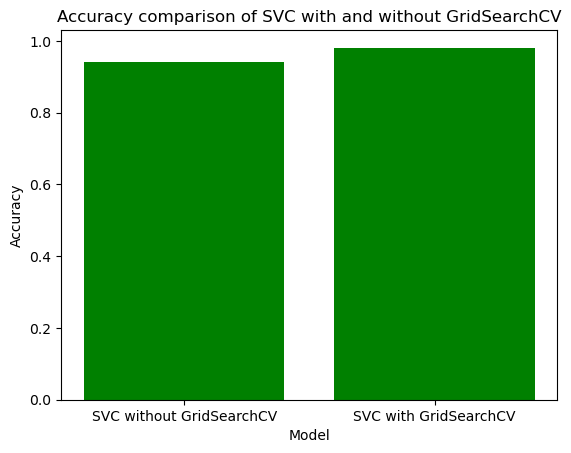

In [41]:
# Define the data to plot
accuracies = [0.9423, 0.9808]
labels = ['SVC without GridSearchCV', 'SVC with GridSearchCV']

# Create the bar plot
plt.bar(labels, accuracies, color = 'green')

# Set the plot title and axis labels
plt.title('Accuracy comparison of SVC with and without GridSearchCV')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

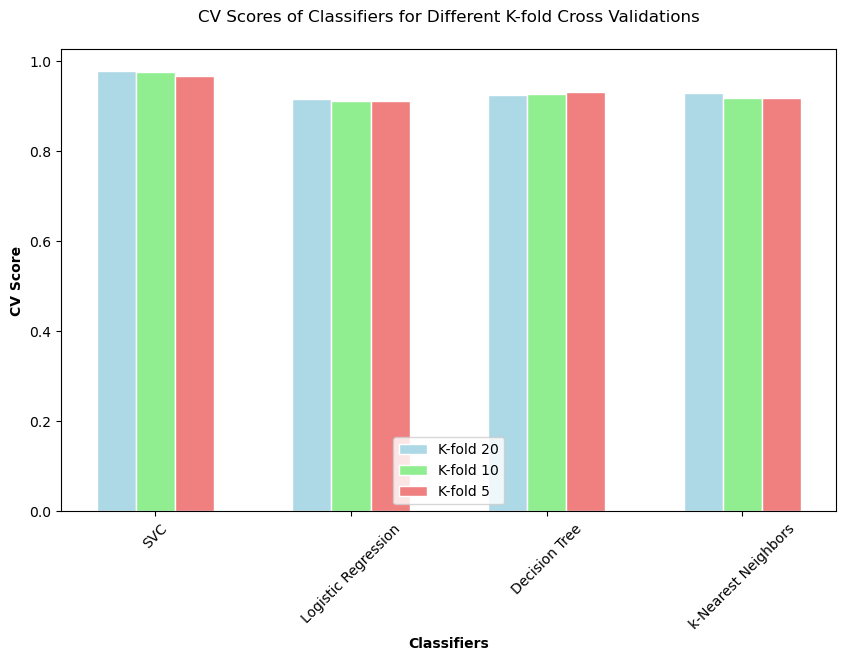

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# CV scores for each fold and classifier
cv_scores_20 = {
    'SVC': 0.9761,
    'Logistic Regression': 0.9137,
    'Decision Tree': 0.9230,
    'k-Nearest Neighbors': 0.9282
}

cv_scores_10 = {
    'SVC': 0.9736,
    'Logistic Regression': 0.9110,
    'Decision Tree': 0.9254,
    'k-Nearest Neighbors': 0.9160
}

cv_scores_5 = {
    'SVC': 0.9664,
    'Logistic Regression': 0.9110,
    'Decision Tree': 0.9303,
    'k-Nearest Neighbors': 0.9159
}

# Extracting classifier names and CV scores
classifiers = list(cv_scores_20.keys())
cv_scores_20_values = list(cv_scores_20.values())
cv_scores_10_values = list(cv_scores_10.values())
cv_scores_5_values = list(cv_scores_5.values())

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the bar width
bar_width = 0.2

# Setting the positions of the bars on the x-axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
ax.bar(r1, cv_scores_20_values, color='lightblue', width=bar_width, edgecolor='white', label='K-fold 20')
ax.bar(r2, cv_scores_10_values, color='lightgreen', width=bar_width, edgecolor='white', label='K-fold 10')
ax.bar(r3, cv_scores_5_values, color='lightcoral', width=bar_width, edgecolor='white', label='K-fold 5')

# Adding labels, title, and x-axis tick labels
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('CV Score', fontweight='bold')
ax.set_title('CV Scores of Classifiers for Different K-fold Cross Validations', pad=20)
ax.set_xticks(r2)
ax.set_xticklabels(classifiers, rotation=45)

# Adding a legend
ax.legend()

# Displaying the chart
plt.show()


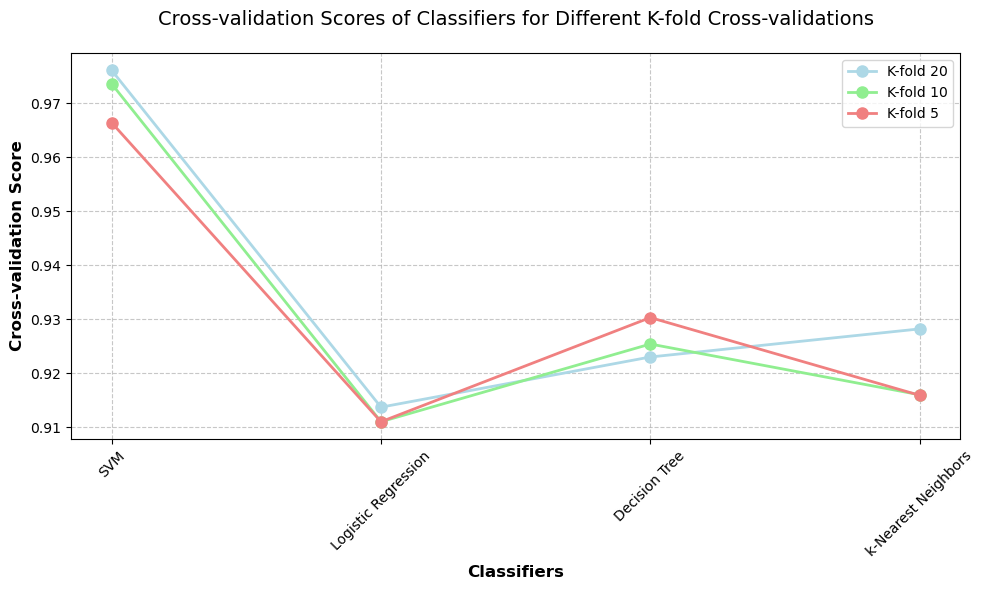

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# CV scores for each fold and classifier
cv_scores_20 = {
    'SVM': 0.9761,
    'Logistic Regression': 0.9137,
    'Decision Tree': 0.9230,
    'k-Nearest Neighbors': 0.9282
}

cv_scores_10 = {
    'SVM': 0.9736,
    'Logistic Regression': 0.9110,
    'Decision Tree': 0.9254,
    'k-Nearest Neighbors': 0.9160
}

cv_scores_5 = {
    'SVM': 0.9664,
    'Logistic Regression': 0.9110,
    'Decision Tree': 0.9303,
    'k-Nearest Neighbors': 0.9159
}

# Extracting classifier names and CV scores
classifiers = list(cv_scores_20.keys())
cv_scores_20_values = list(cv_scores_20.values())
cv_scores_10_values = list(cv_scores_10.values())
cv_scores_5_values = list(cv_scores_5.values())

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the positions of the lines on the x-axis
x = np.arange(len(classifiers))

# Plotting the lines
ax.plot(x, cv_scores_20_values, marker='o', linestyle='-', linewidth=2, markersize=8, color='lightblue', label='K-fold 20')
ax.plot(x, cv_scores_10_values, marker='o', linestyle='-', linewidth=2, markersize=8, color='lightgreen', label='K-fold 10')
ax.plot(x, cv_scores_5_values, marker='o', linestyle='-', linewidth=2, markersize=8, color='lightcoral', label='K-fold 5')

# Adding labels, title, and x-axis tick labels
ax.set_xlabel('Classifiers', fontweight='bold', fontsize=12)
ax.set_ylabel('Cross-validation Score', fontweight='bold', fontsize=12)
ax.set_title('Cross-validation Scores of Classifiers for Different K-fold Cross-validations', pad=20, fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, fontsize=10)

# Adding a legend
ax.legend(fontsize=10)

# Adding grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting plot margins
plt.margins(0.05)

# Displaying the chart
plt.tight_layout()
plt.show()


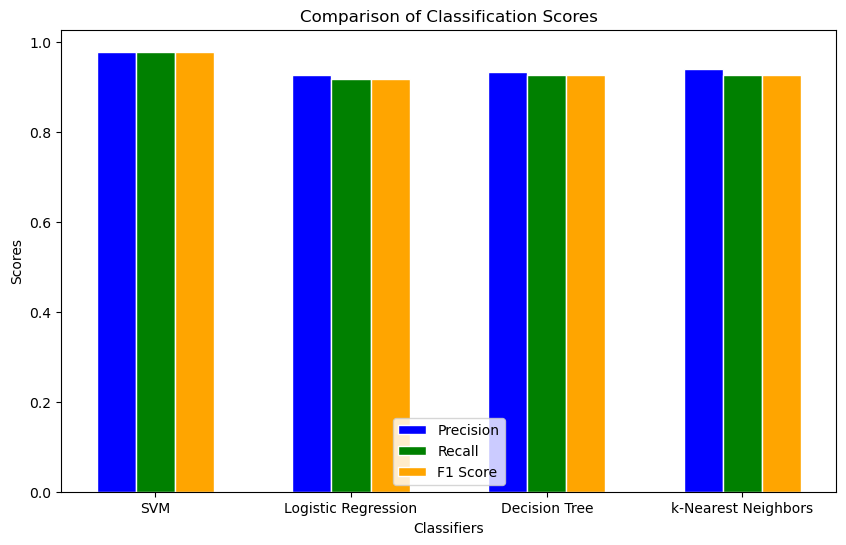

In [8]:
# Define the classifiers and their corresponding scores
classifiers = ['SVM', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
precision = [0.9773, 0.9254, 0.9320, 0.9387]
recall = [0.9761, 0.9161, 0.9254, 0.9260]
f1_score = [0.9760, 0.9163, 0.9249, 0.9264]

# Set the width of the bars
bar_width = 0.2

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the positions of the lines on the x-axis
x = np.arange(len(classifiers))
# Set the positions of the bars on the x-axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the precision, recall, and F1 score bars
ax.bar(r1, precision, color='blue', width=bar_width, edgecolor='white', label='Precision')
ax.bar(r2, recall, color='green', width=bar_width, edgecolor='white', label='Recall')
ax.bar(r3, f1_score, color='orange', width=bar_width, edgecolor='white', label='F1 Score')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers)

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Comparison of Classification Scores')
ax.set_xticks(r2)


# Add a legend
plt.legend()

# Show the plot
plt.show()

In [13]:
 import matplotlib.pyplot as plt
import numpy as np

classifiers = ['SVM', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
Precision = [0.9819, 0.9231, 0.9517, 0.8763]
Recall = [0.9808, 0.9231, 0.9519, 0.8558]
F1_score = [0.9809, 0.9231, 0.9517, 0.8595]


# Extracting classifier names and CV scores
classifiers = list(Precision.keys())
Precision = list(Precision.values())
Recall = list(Recall.values())
F1_score = list(F1_score.values())

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the bar width
bar_width = 0.2

# Setting the positions of the bars on the x-axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
ax.bar(r1, cv_scores_20_values, color='blue', width=bar_width, edgecolor='white', label='Precision')
ax.bar(r2, cv_scores_10_values, color='green', width=bar_width, edgecolor='white', label='Recall')
ax.bar(r3, cv_scores_5_values, color='orange', width=bar_width, edgecolor='white', label='F1 score')

# Adding labels, title, and x-axis tick labels
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Performance Metrics of Classifiers', pad=20)
ax.set_xticks(r2)
ax.set_xticklabels(classifiers, rotation=45)

# Adding a legend
ax.legend()

# Displaying the chart
plt.show()

AttributeError: 'list' object has no attribute 'keys'

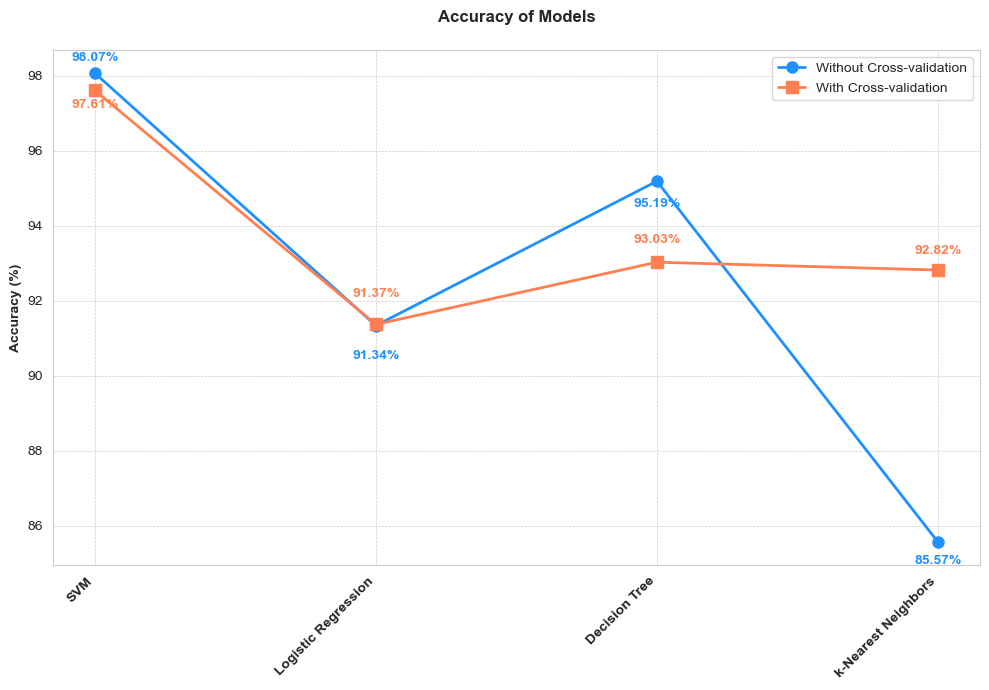

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
accuracy_without_cv = [x * 100 for x in [0.9807, 0.9134, 0.9519, 0.8557]]
accuracy_with_cv = [x * 100 for x in [0.9761, 0.9137, 0.9303, 0.9282]]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Line plots
ax.plot(models, accuracy_without_cv, marker='o', label='Without Cross-validation', color='dodgerblue', linewidth=2, markersize=8)
ax.plot(models, accuracy_with_cv, marker='s', label='With Cross-validation', color='coral', linewidth=2, markersize=8)

# Labels, title, and custom x-axis tick labels
ax.set_ylabel('Accuracy (%)', fontweight='bold')
ax.set_title('Accuracy of Models', fontweight='bold', pad=20)
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models, rotation=45, ha='right', fontweight='bold')  # Rotate Model names to avoid overlap
ax.legend()

# Annotate each point with its value
offsets = [0.4, 0.8, 0.6, 0.5]  # Offset for SVM and other models
for i, (txt1, txt2) in enumerate(zip(accuracy_without_cv, accuracy_with_cv)):
    if i == 0:  # For SVM, swap the positions
        ax.annotate(f"{txt1:.2f}%", (i, txt1 + offsets[i]), ha='center', va='center', fontweight='bold', color='dodgerblue')
        ax.annotate(f"{txt2:.2f}%", (i, txt2 - offsets[i]), ha='center', va='center', fontweight='bold', color='coral')
    else:
        ax.annotate(f"{txt1:.2f}%", (i, txt1 - offsets[i]), ha='center', va='center', fontweight='bold', color='dodgerblue')
        ax.annotate(f"{txt2:.2f}%", (i, txt2 + offsets[i]), ha='center', va='center', fontweight='bold', color='coral')

# Layout adjustment and show plot
fig.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


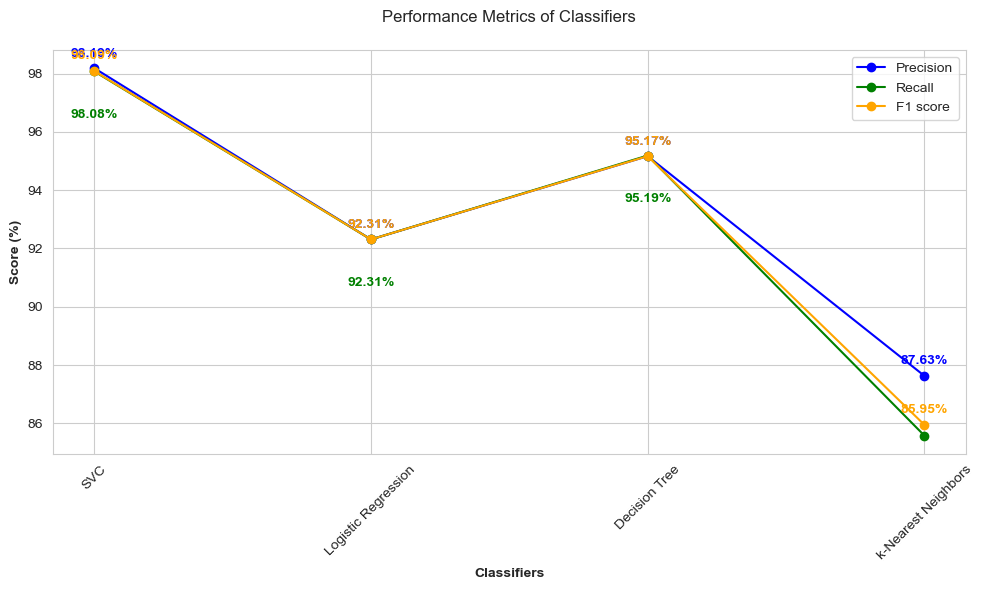

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['SVC', 'Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors']
Precision = [0.9819, 0.9231, 0.9517, 0.8763]
Recall = [0.9808, 0.9231, 0.9519, 0.8558]
F1_score = [0.9809, 0.9231, 0.9517, 0.8595]

# Convert scores to percentages
Precision = [x * 100 for x in Precision]
Recall = [x * 100 for x in Recall]
F1_score = [x * 100 for x in F1_score]

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the lines
ax.plot(classifiers, Precision, marker='o', label='Precision', color='blue')
ax.plot(classifiers, Recall, marker='o', label='Recall', color='green')
ax.plot(classifiers, F1_score, marker='o', label='F1 score', color='orange')

# Annotate each point with its value
for i, (p, r, f) in enumerate(zip(Precision, Recall, F1_score)):
    ax.annotate(f"{p:.2f}%", (i, p + 0.5), ha='center', va='center', fontweight='bold', color='blue')
    ax.annotate(f"{r:.2f}%", (i, r - 1.5), ha='center', va='center', fontweight='bold', color='green')
    ax.annotate(f"{f:.2f}%", (i, f + 0.5), ha='center', va='center', fontweight='bold', color='orange')

# Adding labels, title, and x-axis tick labels
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Score (%)', fontweight='bold')
ax.set_title('Performance Metrics of Classifiers', pad=20)
ax.set_xticks(np.arange(len(classifiers)))
ax.set_xticklabels(classifiers, rotation=45)

# Adding a legend
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()
